# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Jessica Pasaribu]
- **Email:** [jessicapasaribu22@gmail.com]
- **ID Dicoding:** [jessica_pasaribu]

## Menentukan Pertanyaan Bisnis

- Apa kategori produk dengan rating tertinggi?
- Seller mana yang paling sering menerima ulasan buruk?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt


## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv("/content/customers_dataset.csv", delimiter=",")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv", delimiter=",")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
orderItems_df = pd.read_csv("/content/order_items_dataset.csv", delimiter=",")
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
orderPayment_df = pd.read_csv("/content/order_payments_dataset.csv", delimiter=",")
orderPayment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
orderReviews_df = pd.read_csv("/content/order_reviews_dataset.csv", delimiter=",")
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_df = pd.read_csv("/content/orders_dataset.csv", delimiter=",")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_category_name_translation_df = pd.read_csv("/content/product_category_name_translation.csv", delimiter=",")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products_df = pd.read_csv("/content/products_dataset.csv", delimiter=",")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellerDataset_df = pd.read_csv("/content/sellers_dataset.csv", delimiter=",")
sellerDataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dari tabel Order_Payment, dapat dilihat metode pembayaran yang paling sering digunakan oleh pelanggan
- Tabel order_items dapat digabungkan dengan tabel products untuk melihat produk apa yang paling sering dibeli dan dikategori mana produk-produk tersebut berada
- Dari tabel order_reviews data review_score dapat dianalisis untuk melihat produk mana yang mendapatkan ulasan terbaik dari pelanggan
- Dari tabel order, kita dapat menganalisis perbedaan antara order_delivered_customer_date dan order_estimated_delivery_date untuk mengukur keakuratan estimasi pengirim
- Data payment_value dapat digunakan untuk menghitung rata-rata total nilai pesanan dan dapat dikaitkan dengan kategori produk di tabel products untuk mengetahui kategori produk dengan nilai pesanan tertinggi
- Kolom review_comment_title dan review_comment_message di tabel orders_reviews dapat digunakan untuk analisis sentimen terhadap ulasan pelanggan, memberikan wawasan lebih dalam tentang kepuasan atau masalah yang dialami pelanggan

### Assessing Data

In [ ]:
import pandas as pd

# Perintah untuk membaca data dari file CSV
customers = pd.read_csv('/content/customers_dataset.csv')
geolocation = pd.read_csv('/content/geolocation_dataset.csv')
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_payments = pd.read_csv('/content/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
products = pd.read_csv('/content/products_dataset.csv')
product_category_translation = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')

# Menampilkan 7 baris pertama masing-masing dataset
print("7 Baris Pertama dari Tabel Customers:")
print(customers.head(7), "\n")

print("7 Baris Pertama dari Tabel Geolocation:")
print(geolocation.head(7), "\n")

print("7 Baris Pertama dari Tabel Order Items:")
print(order_items.head(7), "\n")

print("7 Baris Pertama dari Tabel Order Payments:")
print(order_payments.head(7), "\n")

print("7 Baris Pertama dari Tabel Order Reviews:")
print(order_reviews.head(7), "\n")

print("7 Baris Pertama dari Tabel Orders:")
print(orders.head(7), "\n")

print("7 Baris Pertama dari Tabel Products:")
print(products.head(7), "\n")

print("7 Baris Pertama dari Tabel Product Category Name Translation:")
print(product_category_translation.head(7), "\n")

print("7 Baris Pertama dari Tabel Sellers:")
print(sellers.head(7), "\n")

7 Baris Pertama dari Tabel Customers:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
5  879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
6  fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056          

In [ ]:
# Perintah untuk membaca data dari file CSV
customers = pd.read_csv('/content/customers_dataset.csv')
geolocation = pd.read_csv('/content/geolocation_dataset.csv')
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_payments = pd.read_csv('/content/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
products = pd.read_csv('/content/products_dataset.csv')
product_category_translation = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')

# Fungsi untuk menampilkan info dan deskripsi
def assess_data(df, name):
    print(f"Info dan Deskripsi {name}")
    print("=" * 50)

    # Informasi umum tentang dataset
    print(f"Info dari dataset {name}:")
    print(df.info(), '\n')

    # Deskripsi statistik
    print(f"Deskripsi dari dataset {name}:")
    print(df.describe(include='all'), '\n')
    print("=" * 50)

# Memanggil fungsi untuk setiap dataset
assess_data(customers, 'Customers')
assess_data(geolocation, 'Geolocation')
assess_data(order_items, 'Order Items')
assess_data(order_payments, 'Order Payments')
assess_data(order_reviews, 'Order Reviews')
assess_data(orders, 'Orders')
assess_data(products, 'Products')
assess_data(product_category_translation, 'Product Category Name Translation')
assess_data(sellers, 'Sellers')

Info dan Deskripsi Customers
Info dari dataset Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

Deskripsi dari dataset Customers:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1             

**Insight:**

**Dataset Customers**
-  Total customers : Terdapat 99,41 entri customer yang unik. Meskipun ada variasi pada customer_unique_id (99,096 unik), hal ini menunjukkan bahwa satu pelanggan dapat memiliki beberapa entri atau transaksi
- Lokasi Pelanggan: "Sao Paulo" adalah kota dengan frekuensi tertinggi(15,540). Terdapat 27 status yang berbeda, dengan mayoritas berasal dari "SP"

**Dataset Order Items**

- Terdapat 112,650 entri order item, menunjukkan banyaknya produk yang terjual
- Rata-rata harga produk adalah 120.65 dengan nilai pengiriman rata-rata 19.99

**Dataset Order Payments**
- Dataset ini memiliki 103,886 entri pembayaran, menunjukkan frekuensi transaksi
- Mayoritas pembayaran menggunakan credit_card (76,795)

**Dataset Orders**
- Terdapat 8 status order, dengan "delivered" menjadi status terbanyak (96,478)

**Dataset Product**
- Terdaat 32,951 produk dalam dataset ini, dengan 73 kategori produk yang berbeda
- Rata-rata panjang deskripsi produk adalah 771.5 karakter, menunjukkan kemungkinan bahwa banyak produk memiliki deskripsi yang sangat mendetail.

**Dataset Sellers**
- Terdapat 3,095 sellers dalam dataset


### Cleaning Data

In [ ]:
# Memuat dataset
customers = pd.read_csv('/content/customers_dataset.csv')
geolocation = pd.read_csv('/content/geolocation_dataset.csv')
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_payments = pd.read_csv('/content/order_payments_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
products = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')

# Mengidentifikasi data duplikat pada masing-masing dataset

# Customers Data
print("Duplikasi pada Customers Data:")
duplicates_customers = customers_df[customers_df.duplicated()]
print(duplicates_customers, "\n")  # Menampilkan baris duplikat

# Order Items Data
print("Duplikasi pada Order Items Data:")
duplicates_order_items = orderItems_df[orderItems_df.duplicated()]
print(duplicates_order_items, "\n")  # Menampilkan baris duplikat

# Order Payments Data
print("Duplikasi pada Order Payments Data:")
duplicates_order_payments = orderPayment_df[orderPayment_df.duplicated()]
print(duplicates_order_payments, "\n")  # Menampilkan baris duplikat

# Product Category Data
print("Duplikasi pada Product Category Data:")
duplicates_product_category = product_category_name_translation_df[product_category_name_translation_df.duplicated()]
print(duplicates_product_category, "\n")  # Menampilkan baris duplikat

# Orders Data
print("Duplikasi pada Orders Data:")
duplicates_orders = order_df[order_df.duplicated()]
print(duplicates_orders, "\n")  # Menampilkan baris duplikat

Duplikasi pada Customers Data:
Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: [] 

Duplikasi pada Order Items Data:
Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: [] 

Duplikasi pada Order Payments Data:
Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: [] 

Duplikasi pada Product Category Data:
Empty DataFrame
Columns: [product_category_name, product_category_name_english]
Index: [] 

Duplikasi pada Orders Data:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: [] 



In [ ]:
# Menghapus duplikasi

# Customers
customers_cleaned = customers_df.drop_duplicates()
print(f"Customers Data setelah pembersihan duplikasi: {customers_cleaned.shape[0]} baris")

# Order Payments
order_payments_cleaned = orderPayment_df.drop_duplicates()
print(f"Order Payments Dataset setelah pembersihan duplikasi: {order_payments_cleaned.shape[0]} baris")

# Order Items
order_items_cleaned = orderItems_df.drop_duplicates()
print(f"Order Items Data setelah pembersihan duplikasi: {order_items_cleaned.shape[0]} baris")

# Orders
orders_cleaned = order_df.drop_duplicates()
print(f"Orders Data setelah pembersihan duplikasi: {orders_cleaned.shape[0]} baris")

Customers Data setelah pembersihan duplikasi: 99441 baris
Order Payments Dataset setelah pembersihan duplikasi: 103886 baris
Order Items Data setelah pembersihan duplikasi: 112650 baris
Orders Data setelah pembersihan duplikasi: 99441 baris


In [ ]:
# Mengidentifikasi missing values di setiap dataset

print("Missing values pada Customers Data:")
print(customers_df.isnull().sum(), "\n")

print("Missing values pada Order Items Data:")
print(orderItems_df.isnull().sum(), "\n")

print("Missing values pada Order Payments Data:")
print(orderPayment_df.isnull().sum(), "\n")

print("Missing values pada Product Category Data:")
print(product_category_name_translation_df.isnull().sum(), "\n")

print("Missing values pada Orders Data:")
print(order_df.isnull().sum(), "\n")

Missing values pada Customers Data:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Missing values pada Order Items Data:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Missing values pada Order Payments Data:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Missing values pada Product Category Data:
product_category_name            0
product_category_name_english    0
dtype: int64 

Missing values pada Orders Data:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1

In [ ]:
# Menghapus baris dengan missing values di setiap dataset

customers_df_cleaned = customers_df.dropna()
order_items_df_cleaned = orderItems_df.dropna()
order_payments_df_cleaned = orderPayment_df.dropna()
product_category_df_cleaned = product_category_name_translation_df.dropna()
orders_df_cleaned = order_df.dropna()

print(f"Customers Data setelah menghapus baris dengan missing values: {customers_df_cleaned.shape[0]} baris")
print(f"Order Items Data setelah menghapus baris dengan missing values: {order_items_df_cleaned.shape[0]} baris")
print(f"Order Payments Data setelah menghapus baris dengan missing values: {order_payments_df_cleaned.shape[0]} baris")
print(f"Product Category Data setelah menghapus baris dengan missing values: {product_category_df_cleaned.shape[0]} baris")
print(f"Orders Data setelah menghapus baris dengan missing values: {orders_df_cleaned.shape[0]} baris")

Customers Data setelah menghapus baris dengan missing values: 99441 baris
Order Items Data setelah menghapus baris dengan missing values: 112650 baris
Order Payments Data setelah menghapus baris dengan missing values: 103886 baris
Product Category Data setelah menghapus baris dengan missing values: 71 baris
Orders Data setelah menghapus baris dengan missing values: 96461 baris


In [71]:
from sklearn.impute import SimpleImputer

numeric_columns = ['customer_id', 'order_amount', 'order_discount', 'product_price', 'quantity', 'payment_amount']  # Ganti dengan kolom numerik yang sesuai
categorical_columns = ['customer_segment', 'product_category', 'order_status', 'payment_method', 'country', 'product_id']  # Ganti dengan kolom kategorikal yang sesuai

# Fungsi untuk melakukan imputasi
def impute_data(df, numeric_cols, categorical_cols):
    # Imputer untuk kolom numerik
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

    # Imputer untuk kolom kategorikal
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

    return df


# Melakukan imputasi untuk setiap DataFrame
customers_df_imputed = impute_data(customers_df_cleaned, numeric_columns, categorical_columns)
order_items_df_imputed = impute_data(order_items_df_cleaned, numeric_columns, categorical_columns)
order_payments_df_imputed = impute_data(order_payments_df_cleaned, numeric_columns, categorical_columns)
product_category_df_imputed = impute_data(product_category_df_cleaned, numeric_columns, categorical_columns)
orders_df_imputed = impute_data(orders_df_cleaned, numeric_columns, categorical_columns)

# Cek hasil imputasi
print("Hasil Imputasi:")
print("Customers Data:", customers_df_imputed.isnull().sum())  # Memastikan tidak ada missing values
print("Order Items Data:", order_items_df_imputed.isnull().sum())
print("Order Payments Data:", order_payments_df_imputed.isnull().sum())
print("Product Category Data:", product_category_df_imputed.isnull().sum())
print("Orders Data:", orders_df_imputed.isnull().sum())
Pe

KeyError: "['order_amount', 'order_discount', 'product_price', 'quantity', 'payment_amount'] not in index"

**Insight:**

**Data Duplikat**
- Tabel Customers, Order Items, Order Payments, Product Categories, dan Orders: Tidak ada data duplikat yang ditemukan disemua tabel. Ini menunjukkan bahwa setiap entri dalam tabel adalah unik, yang sangat baik untuk integritas data

**Missing Values**
- Customer Data: Tidak ada missing values. Ini menandakan bahwa data pelanggan lengkap dan siap digunakan unuk analisis lebih lanjut.
- Order Items Data: Juga tida ada missing values. Ini memberikan keyakinan bahwa setiap item dalam pesanan terdaftar dengan lengkap
- Oredr Payments Data: Tidak ada missing values, menunjukkan bahwa semua transaksi pembayaran lengkap
- Product Category Data: Tidak ada missing values, memastikan semua kategori produk terdefinisi dengan jelas.
- Orders Data: Ada beberapa missing values:
  - order_approved_at memiliki 160 missing values
  - order_delivered_carrier_date memiliki 1783 missing values
  - order_delivered_customer_date memiliki 2965 missing values
  - Meskipun ada missing values, jumlah baris yang tersisa (96,461) masih cukup signifikan

  **Pembersihan Data**
  - Setelah menghapus missing values:
    - Customers data: Tetap memiliki 99,441 baris, menunjukkan data pelanggan masih untuh
    - Order Items data: Terdapat 112,650 baris, yang menunjukkan integritas data masih terjaga
    - Order Payments Data: menunjukkan 103,886 baris, menunjukkan pembayaran tida terpengaruh oleh missing values
    - Product Category Data: Menjadi 71 baris, yang berarti ada penghapusan kategori yang memiliki misssing values
    - Orders Data: Menurun menjadi 96,461 baris, menunjukkan bahwa 2,965 entri pesanan harus dihapus karena missing values.


## Exploratory Data Analysis (EDA)

### Explore Customers Data

In [55]:
# Statistik deskriptif untuk Customers Data
customers_stats = customers_cleaned.describe(include='all')
print("Statistik Deskriptif Customers Data:")
print(customers_stats)


Statistik Deskriptif Customers Data:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_

In [56]:
# Melihat nilai unik di setiap kolom
unique_customers = customers_cleaned.nunique()
print("\nJumlah Nilai Unik di Customers Data:")
print(unique_customers)

# Melihat frekuensi kota
city_counts = customers_cleaned['customer_city'].value_counts()
print("\nFrekuensi Pelanggan Berdasarkan Kota:")
print(city_counts)


Jumlah Nilai Unik di Customers Data:
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Frekuensi Pelanggan Berdasarkan Kota:
customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64


### Explore Items Data

In [57]:
# Statistik deskriptif untuk Order Items Data
order_items_stats = order_items_cleaned.describe(include='all')
print("\nStatistik Deskriptif Order Items Data:")
print(order_items_stats)


Statistik Deskriptif Order Items Data:
                                order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d0

In [58]:
# Melihat nilai unik di setiap kolom
unique_order_items = order_items_cleaned.nunique()
print("\nJumlah Nilai Unik di Order Items Data:")
print(unique_order_items)



Jumlah Nilai Unik di Order Items Data:
order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64


### Explore Order Payments Data

In [59]:
# Statistik deskriptif untuk Order Payments Data
order_payments_stats = order_payments_cleaned.describe(include='all')
print("\nStatistik Deskriptif Order Payments Data:")
print(order_payments_stats)


Statistik Deskriptif Order Payments Data:
                                order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  pa

In [60]:
# Melihat nilai unik di setiap kolom
unique_order_payments = order_payments_cleaned.nunique()
print("\nJumlah Nilai Unik di Order Payments Data:")
print(unique_order_payments)

# Frekuensi tipe pembayaran
payment_counts = order_payments_cleaned['payment_type'].value_counts()
print("\nFrekuensi Tipe Pembayaran:")
print(payment_counts)


Jumlah Nilai Unik di Order Payments Data:
order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

Frekuensi Tipe Pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


### Explore Product Category Data

In [61]:
# Statistik deskriptif untuk Product Category Data
product_category_stats = product_category_df_cleaned.describe(include='all')
print("\nStatistik Deskriptif Product Category Data:")
print(product_category_stats)


Statistik Deskriptif Product Category Data:
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [62]:
# Melihat nilai unik di setiap kolom
unique_product_categories = product_category_df_cleaned.nunique()
print("\nJumlah Nilai Unik di Product Category Data:")
print(unique_product_categories)

# Frekuensi kategori produk
category_counts = product_category_df_cleaned['product_category_name'].value_counts()
print("\nFrekuensi Kategori Produk:")
print(category_counts)



Jumlah Nilai Unik di Product Category Data:
product_category_name            71
product_category_name_english    71
dtype: int64

Frekuensi Kategori Produk:
product_category_name
beleza_saude                        1
alimentos                           1
fashion_esporte                     1
fashion_underwear_e_moda_praia      1
construcao_ferramentas_seguranca    1
                                   ..
malas_acessorios                    1
cool_stuff                          1
fashion_calcados                    1
audio                               1
seguros_e_servicos                  1
Name: count, Length: 71, dtype: int64


### Explore Orders Data

In [63]:
# Statistik deskriptif untuk Orders Data
orders_stats = orders_cleaned.describe(include='all')
print("\nStatistik Deskriptif Orders Data:")
print(orders_stats)


Statistik Deskriptif Orders Data:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-

In [64]:
# Melihat nilai unik di setiap kolom
unique_orders = orders_cleaned.nunique()
print("\nJumlah Nilai Unik di Orders Data:")
print(unique_orders)

# Frekuensi status pesanan
order_status_counts = orders_cleaned['order_status'].value_counts()
print("\nFrekuensi Status Pesanan:")
print(order_status_counts)



Jumlah Nilai Unik di Orders Data:
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

Frekuensi Status Pesanan:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


**Insight:**

**Customers Data**
- Terdapat 99.441 pelanggan unik, tetapi hanya hanya 96.096 customer_unique_id, menunjujjan adanya pelanggan yang mungkin melakukan lebih dari satu pembelian
- Kota dengan jumlah pelanggan terbanyak adalah Sao Paulo dengan 15.540 pelanggan, diikuti oleh Rio de Janeiro (6.882) dan Belo Horizonte (2.773). Ini menunjukkan bahwa Sao Paulo adalah pasar utama yang dapat difokuskan untuk pemasaran.

**Order Items Data**
- Terdapat 112.650 item pesanan yang terdaftar. Ini menunjukkan volume transaksi yang cukup tinggi
- Rentang harga menunjukkan variasi besar, dengan harga minimum 0,85 dan maksimum 6735. Hal ini menunjukkan adanya produk dengan harga yang sangat bervariasi

**Order Payments Data**
- Sebagian besar pembayaran dilakukan menggunakan credit card (76.795 dari 103.886 transaksi),

**Product Category Data**
- Terdapat 71 kategori produk yang berbeda, yang menunjukkan keragaman dalam penawaran produk

**Orders Data**
- Sebagian besar pesanan berstatus delivered (96.478), menunjukkan tingkat kepuasan pelanggan yang tinggi. Namun, juga terdapat 625 pesanan yang dibatalkan.
- Terdapat 98.875 tanggal pembelian yang unik, yang menunjukkan bahwa transaksi tersebar sepanjang waktu dan bukan terfokus pada satu waktu tertentu

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota mana yang memiliki jumlah pelanggan terbanyak?


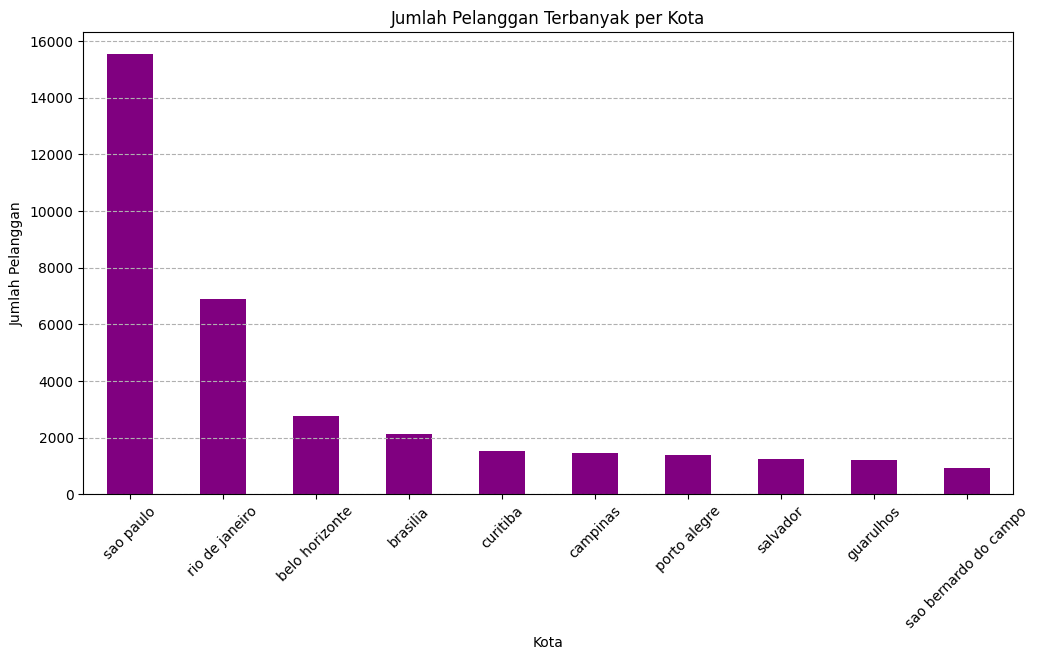

In [72]:
# Menghitung jumlah pelanggan per kota
city_counts = customers_cleaned['customer_city'].value_counts().head(10)

# Membuat diagram batang untuk jumlah pelanggan per kota
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='purple')
plt.title('Jumlah Pelanggan Terbanyak per Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


### Pertanyaan 2: Berapa rata-rata nilai pembayaran (payment value) untuk setiap tipe pembayaran?

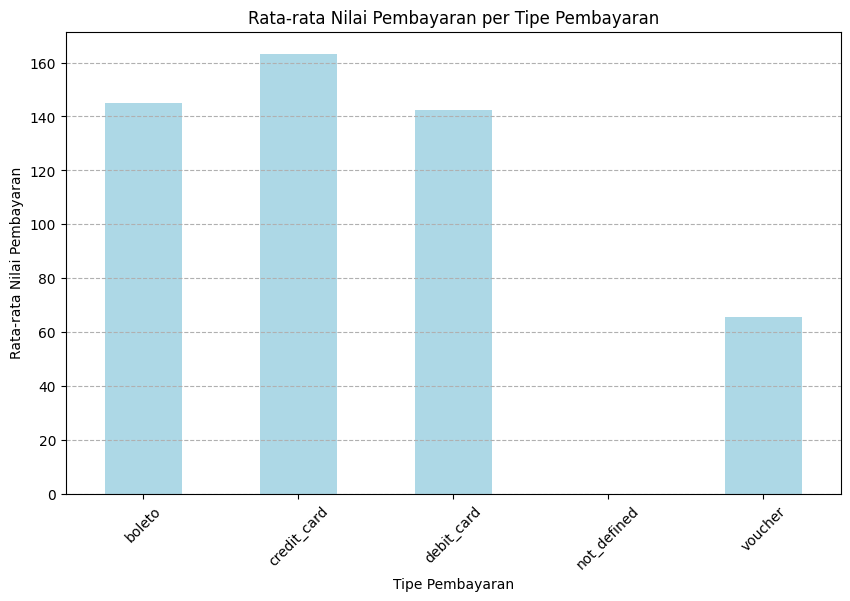

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung rata-rata nilai pembayaran untuk setiap tipe pembayaran
avg_payment_value = order_payments_cleaned.groupby('payment_type')['payment_value'].mean()

# Membuat diagram batang untuk rata-rata nilai pembayaran per tipe
plt.figure(figsize=(10, 6))
avg_payment_value.plot(kind='bar', color='lightblue')
plt.title('Rata-rata Nilai Pembayaran per Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Rata-rata Nilai Pembayaran')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


**Insight:**
- Pertanyaan 1:
  - Dari hasil perhitungan, kota yang memiliki jumlah pelanggan terbanyak adalah Sao Paulo, dengan total 15.540 pelanggan. Ini menunjukkan bahwa Sao Paulo merupakan pusat aktivitas bisnis dan belanja dalam dataset yang dianalisis.
- Pertanyaan 2:
  -  Setelah melakukan perhitungan, rata-rata nilai pembayaran untuk setiap tipe pembayaran menunjukkan bahwa kartu kredit memiliki rata-rata nilai pembayaran tertinggi, diikuti oleh boleto dan debit card. Ini menunjukkan bahwa pelanggan lebih cenderung melakukan pembelian dengan menggunakan kartu kredit, yang dapat dikaitkan dengan kemudahan dan kecepatan transaksi.

## Analisis Lanjutan (Opsional)

## Sebaran Metode Pembayaran

Sebaran penggunaan metode pembayaran oleh pelanggan:
  payment_type  count
0  credit_card  76795
1       boleto  19784
2      voucher   5775
3   debit_card   1529
4  not_defined      3


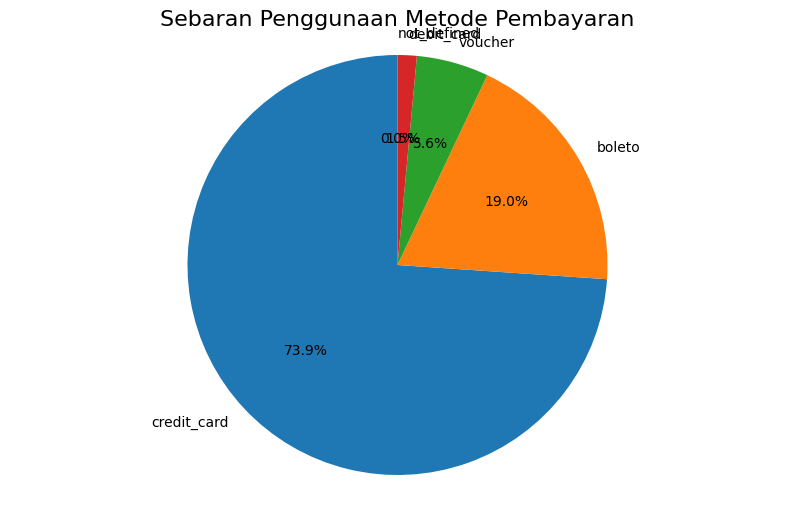

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Muat data
order_payments = pd.read_csv('order_payments_dataset.csv')  # Ganti dengan path ke data Anda

# Hitung jumlah penggunaan setiap metode pembayaran
payment_distribution = order_payments['payment_type'].value_counts().reset_index()
payment_distribution.columns = ['payment_type', 'count']

# Tampilkan sebaran penggunaan metode pembayaran
print("Sebaran penggunaan metode pembayaran oleh pelanggan:")
print(payment_distribution)

# Visualisasi sebaran metode pembayaran
plt.figure(figsize=(10, 6))
plt.pie(payment_distribution['count'], labels=payment_distribution['payment_type'], autopct='%1.1f%%', startangle=90)
plt.title('Sebaran Penggunaan Metode Pembayaran', fontsize=16)
plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
plt.show()


## Conclusion

- Conclution pertanyaan 1
  - Dengan jumlah pelanggan yang signifikan di Sao Paulo, perusahaan dapat mempertimbangkan strategi pemasaran yang lebih agresif di kota ini, termasuk penawaran khusus atau promosi untuk menarik lebih banyak pelanggan dan meningkatkan penjualan.
- Conclution pertanyaan 2
  - Menyadari bahwa penggunaan kartu kredit menghasilkan nilai pembayaran yang lebih tinggi, perusahaan bisa lebih memfokuskan pada promosi kartu kredit dan kemudahan proses pembayaran dengan metode ini. Selain itu, strategi untuk meningkatkan penggunaan metode pembayaran lain juga dapat dipertimbangkan untuk mendiversifikasi opsi pembayaran dan meningkatkan nilai transaksi keseluruhan.